## Compresión de los datos

In [1]:
import pandas as pd
import dtale as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Markdown

In [2]:
#Global variables in notebook
pd.set_option('display.max_columns', None)
path_data = '../../data/raw/Base.csv'

In [3]:
data = pd.read_csv(path_data)
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Descripción de los datos 

In [4]:
print(data.shape)

(1000000, 32)


In [5]:
# Verificar si los índices son únicos
print("Verificar si los índices son únicos: ",data.index.is_unique)
registros, columnas = (data.shape)
print("El dataset contiene {registros} registros y {columnas} columnas.".format(registros=registros,columnas=columnas))
# Se imprime todas las columnas del dataset con un salto de línea cada 6 columnas
columnas = data.columns.to_list()
print('Las columnas del dataset son:', end="\n")
for i in range(0, len(columnas), 8):
    print(', '.join(columnas[i:i+8]))

Verificar si los índices son únicos:  True
El dataset contiene 1000000 registros y 32 columnas.
Las columnas del dataset son:
fraud_bool, income, name_email_similarity, prev_address_months_count, current_address_months_count, customer_age, days_since_request, intended_balcon_amount
payment_type, zip_count_4w, velocity_6h, velocity_24h, velocity_4w, bank_branch_count_8w, date_of_birth_distinct_emails_4w, employment_status
credit_risk_score, email_is_free, housing_status, phone_home_valid, phone_mobile_valid, bank_months_count, has_other_cards, proposed_credit_limit
foreign_request, source, session_length_in_minutes, device_os, keep_alive_session, device_distinct_emails_8w, device_fraud_count, month


### Descripción de los datos

| **Columna**                               | **Tipo de dato**                    | **Descripción**                                                                                                           | **Rangos**               |
|-------------------------------------------|-----------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------|--------------------------|
| income                                    | Numérico                                      | Ingreso anual del solicitante (en forma de decil).                                                                                  | [0.1, 0.9]               |
| name_email_similarity                     | Numérico                                      | Métrica de similitud entre el correo electrónico y el nombre del solicitante. Valores más altos representan mayor similitud.        | [0, 1]                   |
| prev_address_months_count                 | Numérico                                      | Número de meses en la dirección anterior registrada del solicitante, es decir, la residencia anterior del solicitante, si aplica.    | [−1, 380]                |
| current_address_months_count              | Numérico                                      | Meses en la dirección registrada actual del solicitante.                                                                            | [−1, 429]                |
| customer_age                              | Numérico                                      | Edad del solicitante en años, redondeada a la década.                                                                               | [10, 90]                 |
| days_since_request                        | Numérico                                      | Número de días transcurridos desde que se realizó la solicitud.                                                                    | [0, 79]                  |
| intended_balcon_amount                    | Numérico                                      | Monto inicial transferido para la solicitud.                                                                                       | [−16, 114]               |
| payment_type                              | Categórico                                    | Tipo de plan de pago de crédito. 5 valores posibles (anonimizados).                                                                  | -                        |
| zip_count_4w                              | Numérico                                      | Número de solicitudes dentro del mismo código postal en las últimas 4 semanas.                                                     | [1, 6830]                |
| velocity_6h                               | Numérico                                      | Velocidad de las aplicaciones totales realizadas en las últimas 6 horas, es decir, el número promedio de solicitudes por hora.      | [−175, 16818]            |
| velocity_24h                              | Numérico                                      | Velocidad de las aplicaciones totales realizadas en las últimas 24 horas, es decir, el número promedio de solicitudes por hora.     | [1297, 9586]             |
| velocity_4w                               | Numérico                                      | Velocidad de las aplicaciones totales realizadas en las últimas 4 semanas, es decir, el número promedio de solicitudes por hora.    | [2825, 7020]             |
| bank_branch_count_8w                      | Numérico                                      | Número total de solicitudes en la sucursal bancaria seleccionada en las últimas 8 semanas.                                         | [0, 2404]                |
| date_of_birth_distinct_emails_4w          | Numérico                                      | Número de correos electrónicos de solicitantes con la misma fecha de nacimiento en las últimas 4 semanas.                           | [0, 39]                  |
| employment_status                         | Categórico                                    | Estado de empleo del solicitante. 7 valores posibles (anonimizados).                                                                | -                        |
| credit_risk_score                         | Numérico                                      | Puntuación interna de riesgo de la solicitud.                                                                                       | [−191, 389]              |
| email_is_free                             | Binario                                       | Dominio del correo electrónico de la solicitud (ya sea gratuito o de pago).                                                          | -                        |
| housing_status                            | Categórico                                    | Estado residencial actual del solicitante. 7 valores posibles (anonimizados).                                                      | -                        |
| phone_home_valid                          | Binario                                       | Validez del teléfono fijo proporcionado.                                                                                            | -                        |
| phone_mobile_valid                        | Binario                                       | Validez del teléfono móvil proporcionado.                                                                                            | -                        |
| bank_months_count                         | Numérico                                      | Cuántos meses tiene la cuenta anterior (si la tiene).                                                                               | [−1, 32]                 |
| has_other_cards                           | Binario                                       | Si el solicitante tiene otras tarjetas de la misma entidad bancaria.                                                               | -                        |
| proposed_credit_limit                     | Numérico                                      | Límite de crédito propuesto para el solicitante.                                                                                   | [200, 2000]              |
| foreign_request                           | Binario                                       | Si el país de origen de la solicitud es diferente al del banco.                                                                     | -                        |
| source                                    | Categórico                                    | Fuente en línea de la solicitud. Ya sea navegador (INTERNET) o aplicación (TELEAPP).                                                  | -                        |
| session_length_in_minutes                 | Numérico                                      | Duración de la sesión del usuario en el sitio web bancario en minutos.                                                              | [−1, 107]                |
| device_os                                 | Categórico                                    | Sistema operativo del dispositivo que realizó la solicitud. Los valores posibles son: Windows, macOS, Linux, X11, u otro.            | -                        |
| keep_alive_session                        | Binario                                       | Opción del usuario sobre el cierre de sesión.                                                                                       | -                        |
| device_distinct_emails_8w                 | Numérico                                      | Número de correos electrónicos distintos en el sitio web bancario desde el dispositivo utilizado en las últimas 8 semanas.            | [−1, 2]                  |
| device_fraud_count                        | Numérico                                      | Número de solicitudes fraudulentas con el dispositivo utilizado.                                                                    | [0, 1]                   |
| month                                     | Numérico                                      | Mes en el que se realizó la solicitud.                                                                                              | [0, 7]                   |
| fraud_bool                                | Binario                                       | Si la solicitud es fraudulenta o no.                                                                                                | -                        |


In [6]:
numerical_columns = ['income','name_email_similarity','prev_address_months_count','current_address_months_count','customer_age','days_since_request','intended_balcon_amount','zip_count_4w','velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w','date_of_birth_distinct_emails_4w','credit_risk_score','bank_months_count','proposed_credit_limit','session_length_in_minutes','device_distinct_emails_8w','device_fraud_count','month']
categorical_columns = ['payment_type','employment_status','email_is_free','housing_status','phone_home_valid','phone_mobile_valid','has_other_cards','foreign_request','source','device_os','keep_alive_session','fraud_bool']

# Convertir todas las columnas a categóricas
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))

### Descripción de manera general de los tipos de variable para las columnas del dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  float64 
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  int64   
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  category
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

### Verificar la cantidad de valores nulos en el datframe

In [8]:
#Se muestra la cantidad de registros por columa que tienen valores nulos
pd.DataFrame(data.isna().sum()).T.style.background_gradient()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Verificar la cantidad de registros duplicados

In [9]:
data_duplicated = data[data.duplicated()]
data_duplicated

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


### Descripción de los datos de manera general usando medidas estadisticas
Se muestra los datos como si fueran un mapa da calor para poder identificar de mejor manera los datos extremos para una variable

In [10]:
data.describe(percentiles=[.25, .50, .75, 1]).T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,100%,max
income,1000000.000000,0.562696,0.290343,0.100000,0.300000,0.600000,0.800000,0.900000,0.900000
name_email_similarity,1000000.000000,0.493694,0.289125,0.000001,0.225216,0.492153,0.755567,0.999999,0.999999
prev_address_months_count,1000000.000000,16.718568,44.046230,-1.000000,-1.000000,-1.000000,12.000000,383.000000,383.000000
current_address_months_count,1000000.000000,86.587867,88.406599,-1.000000,19.000000,52.000000,130.000000,428.000000,428.000000
customer_age,1000000.000000,33.689080,12.025799,10.000000,20.000000,30.000000,40.000000,90.000000,90.000000
days_since_request,1000000.000000,1.025705,5.381835,0.000000,0.007193,0.015176,0.026331,78.456904,78.456904
intended_balcon_amount,1000000.000000,8.661499,20.236155,-15.530555,-1.181488,-0.830507,4.984176,112.956928,112.956928
zip_count_4w,1000000.000000,1572.692049,1005.374565,1.000000,894.000000,1263.000000,1944.000000,6700.000000,6700.000000
velocity_6h,1000000.000000,5665.296605,3009.380665,-170.603072,3436.365848,5319.769349,7680.717827,16715.565404,16715.565404
velocity_24h,1000000.000000,4769.781965,1479.212612,1300.307314,3593.179135,4749.921161,5752.574191,9506.896596,9506.896596


## Analisis univariante de los datos
### Analisis de cada una de las variables que conforman el dataset
Este analisis se lo realiza para conocer como esta la distribución de los datos y conocer la calidad de los mismos

In [11]:
def interpretar_skewness(df, column):
    """
    Esta función calcula e interpreta el skewness de una columna específica en un DataFrame.
    
    :param df: DataFrame que contiene los datos.
    :param columna: Nombre de la columna para la cual se desea calcular el skewness.
    :return: Una interpretación del skewness y recomendaciones.
    """
    # Calcular el skewness
    skewness = df[column].skew()
    resultado = f'2) Skewness: {skewness}\n *Interpretación: '
    
    # Interpretar el skewness
    if skewness == 0:
        resultado += "La distribución es simétrica.\n"
        recommendation = "Se puede usar técnicas estadísticas que asumen normalidad."
    elif skewness > 0:
        resultado += "La distribución tiene cola larga a la derecha (asimetría positiva).\n"
        recommendation = "Considerar usar la mediana en lugar de la media. " \
                        "Se debe de verifica si hay outliers en el lado derecho."
    else:
        resultado += "La distribución tiene cola larga a la izquierda (asimetría negativa).\n"
        recommendation = "Considerar  la mediana en lugar de la media. " \
                        "Se debe de verifica si hay outliers en el lado izquierdo."
    resultado +=" *Interpretación de la magnitud: "
    # Evaluar la magnitud del skewness
    if 0 < skewness < 0.5 or -0.5 < skewness < 0:
        resultado += "Asimetría baja. La distribución es casi simétrica.\n"
    elif 0.5 <= skewness < 1 or -1 < skewness <= -0.5:
        resultado += "Asimetría moderada. La distribución presenta cierta asimetría.\n"
    elif 1 <= skewness < 2 or -2 < skewness <= -1:
        resultado += "Asimetría alta. La distribución es significativamente sesgada.\n"
    else:
        resultado += "Asimetría muy alta. La distribución es extremadamente sesgada.\n"

    # Imprimir recomendaciones
    resultado += " *Recomendaciones: " + recommendation
    
    return resultado

def interpretar_kurtosis(df, column):
    """
    Esta función interpreta el skewness de una columna específica en un DataFrame.
    
    :param valor_kurtosis: valor de valor_kurtosis
    """
    valor_kurtosis =  df[column].kurtosis()
    resultado = f'3) Kurtosis: {valor_kurtosis}\n *Interpretación: '
    if 2.9 <= valor_kurtosis <= 3.1:
        resultado += "La distribución es mesocúrtica (similar a una normal)"
    elif valor_kurtosis > 3:
        if 3 < valor_kurtosis <= 4:
            resultado += "La distribución es leptocúrtica (colas más gruesas, algunos outliers)"
        else:
            resultado += "La distribución es leptocúrtica (colas muy gruesas, muchos outliers)"
    elif valor_kurtosis < 3:
        if 2 <= valor_kurtosis < 3:
            resultado += "La distribución es platicúrtica (colas más delgadas, pocos outliers)"
        else:
            resultado += "La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)"
        
    return resultado

def detectar_outliers_graphical(df, column,k=1.5):
    """
    Detecta outliers en un DataFrame utilizando dos métodos: IQR y Z-score.

    :param df: DataFrame de pandas
    :param columna: Nombre de la columna en la que se buscan outliers
    :return: DataFrame con outliers detectados por ambos métodos
    """
    
    # Método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - k*IQR
    limite_superior = Q3 + k*IQR

    # Identificar outliers usando IQR
    outliers_IQR =len(df[(df[column] < limite_inferior) | (df[column] > limite_superior)])
    outlier = {'variable':column,'num_outliers': outliers_IQR}
    return f"4) Se ha detectado {outliers_IQR} outliers en los datos", outlier

def analysis_numeric_colum(df,col,k=2,ylabel=None,xlabel=None,title_hist=None,title_bar=None):
    sns.set(font_scale=0.8)
    sns.set_style("white")
    #Crear un histograma para las variables numericas
    sns.histplot(df[col])
    if (ylabel is not None):
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Frecuencia")
    if (xlabel is not None):
        plt.xlabel(xlabel)
    plt.title("Histograma de la variable {var}".format(var=col), fontsize=14)
    plt.tight_layout()        
    plt.show()
    
    #Para graficar el box plot
    sns.set(style="whitegrid")
    sns.boxplot(x=df[col])
    plt.title('Diagrama de caja de la variable {var}'.format(var=col))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()        
    plt.show()
    
    result = stats.anderson(df[col])
    message, outlier = detectar_outliers_graphical(df,col,k)

    print("***Resumen de la variable***")
    if result.statistic < result.critical_values[2]:
        print('1) Los datos provienen de una distribución normal al nivel de significancia del 5%.')
    else:
        print('1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.')
    
    print(interpretar_skewness(df=df,column=col))
    print(interpretar_kurtosis(df=df, column=col))
    print(message)
    print("5) Datos resumidos de la variable")
    print(df[col].describe())
    return outlier

def detectar_outliers_var(df,input_columns,k=1.5):
    outliers = pd.DataFrame(columns=df.columns)
    
    for col in input_columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - k * IQR
            limite_superior = Q3 + k * IQR
            outliers_col = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
            outliers = pd.concat([outliers, outliers_col], axis=0)
    
    return outliers.drop_duplicates()


def eliminar_outliers_iqr_multi(df, columns, k=1.5):
    df_filtrado = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        # Filtrar filas que no son outliers en la columna actual
        df_filtrado = df_filtrado[(df_filtrado[column] >= lower_bound) & (df_filtrado[column] <= upper_bound)]
    
    return df_filtrado

def generate_boxplot(data, numerical_cols, title = 'Distribución de Variables Numéricas'):
    # Generar box plots para las variables numéricas
    # Estilo y tamaño del gráfico
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")  # Estilo de fondo del gráficogenerate_boxplot

    # Crear el box plot utilizando Seaborn para una apariencia más elegante
    sns.boxplot(data=data[numerical_cols])
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Variables', fontsize=14)
    plt.ylabel('Valor', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

def make_histogram(df,variable):
    city_counts = df[variable].value_counts()

    plt.figure(figsize=(10, 6))
    city_counts.plot(kind='bar', color='steelblue')

    plt.title("Frecuencia de observaciones por {variable}".format(variable=variable))
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=0, ha="right")  # Rotar etiquetas para mejor lectura
    plt.tight_layout()  # Ajusta el gráfico para evitar que se corten las etiquetas
    plt.show()


def analysis_categorical_colum(df,col,ylabel='Frecuencia',xlabel='Categoria'):
    print("***Resumen de la variable***")
    value_cont = df[col].value_counts()
    bars = plt.bar(value_cont.index.astype(str), value_cont, color='skyblue')

    # Añadir etiquetas a las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')
 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if (ylabel is not None):
        plt.ylabel(ylabel)
    if (xlabel is not None):
        plt.xlabel(xlabel)
    plt.title('Grafico de barra de la variable {var}'.format(var=col))
    plt.tight_layout()
    plt.show()

### Analisis de las variables categoricas

#### Analisis de la variable categorica payment_type

***Resumen de la variable***


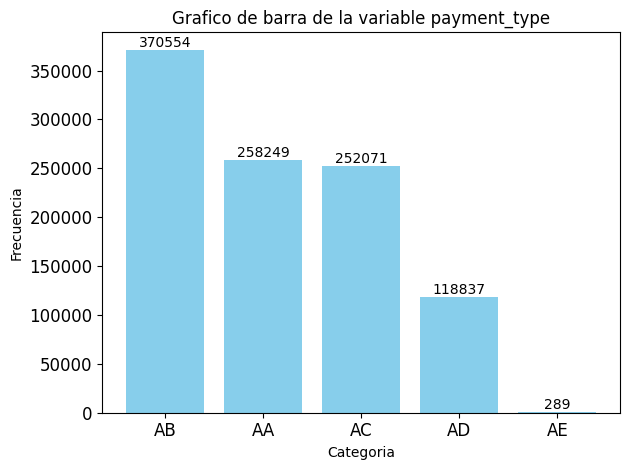

#### Analisis de la variable categorica employment_status

***Resumen de la variable***


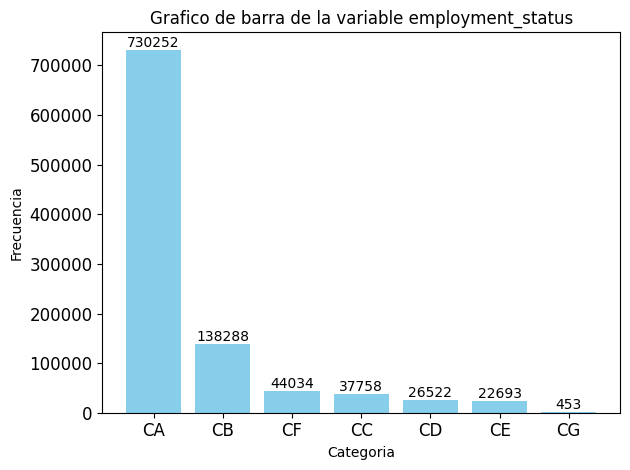

#### Analisis de la variable categorica email_is_free

***Resumen de la variable***


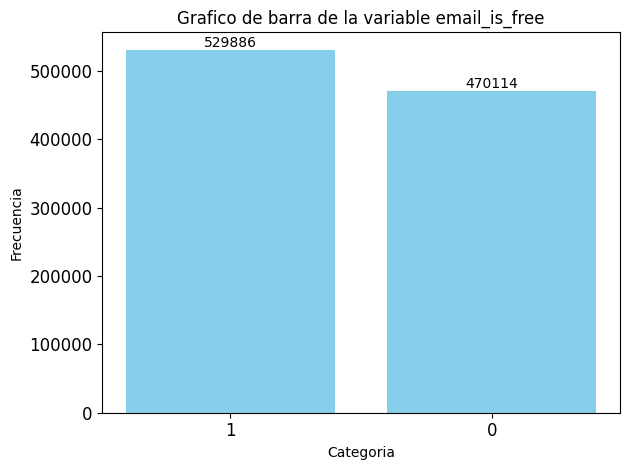

#### Analisis de la variable categorica housing_status

***Resumen de la variable***


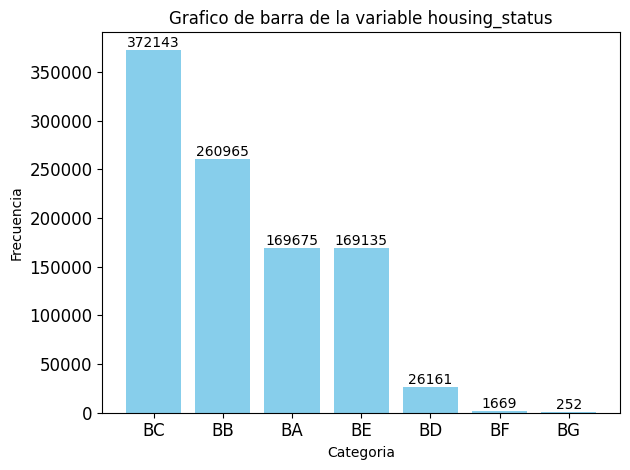

#### Analisis de la variable categorica phone_home_valid

***Resumen de la variable***


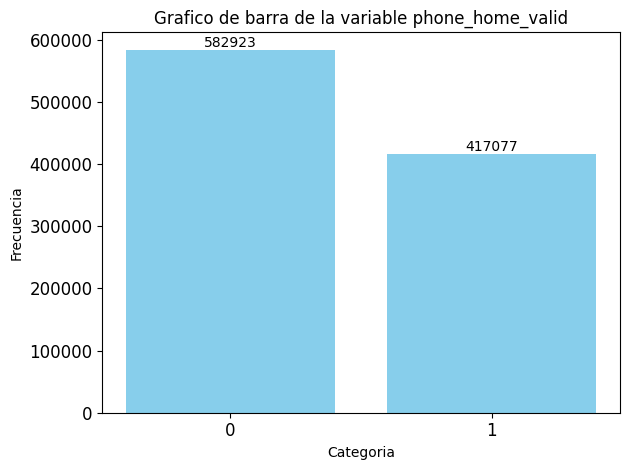

#### Analisis de la variable categorica phone_mobile_valid

***Resumen de la variable***


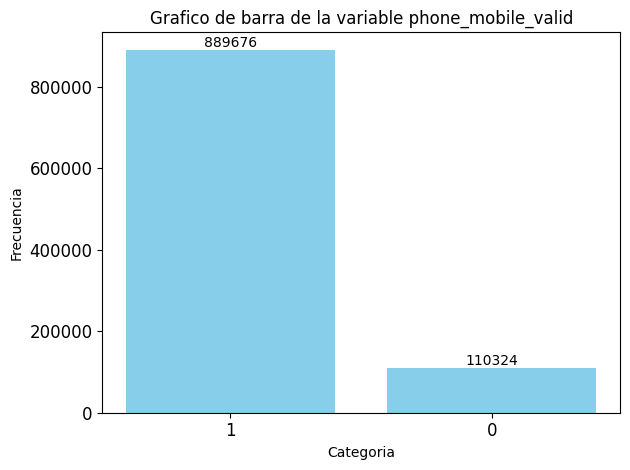

#### Analisis de la variable categorica has_other_cards

***Resumen de la variable***


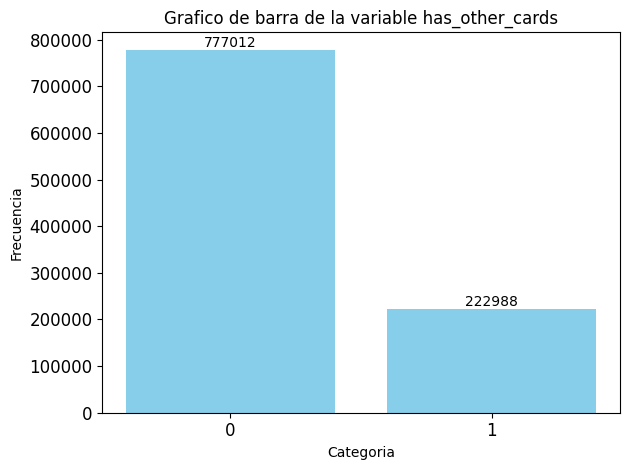

#### Analisis de la variable categorica foreign_request

***Resumen de la variable***


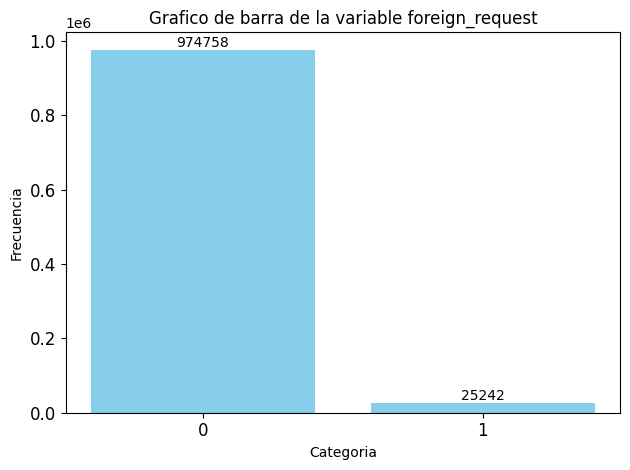

#### Analisis de la variable categorica source

***Resumen de la variable***


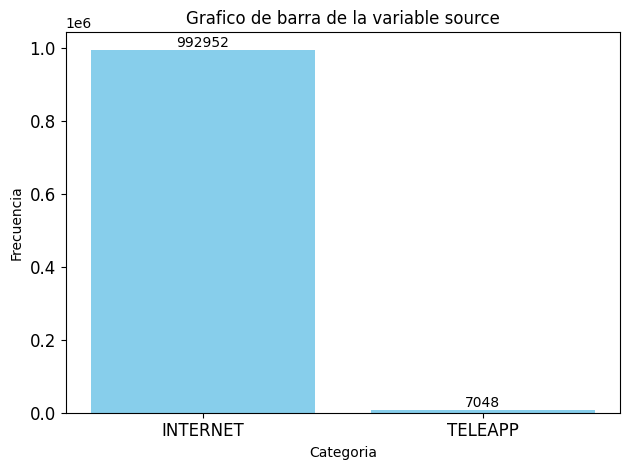

#### Analisis de la variable categorica device_os

***Resumen de la variable***


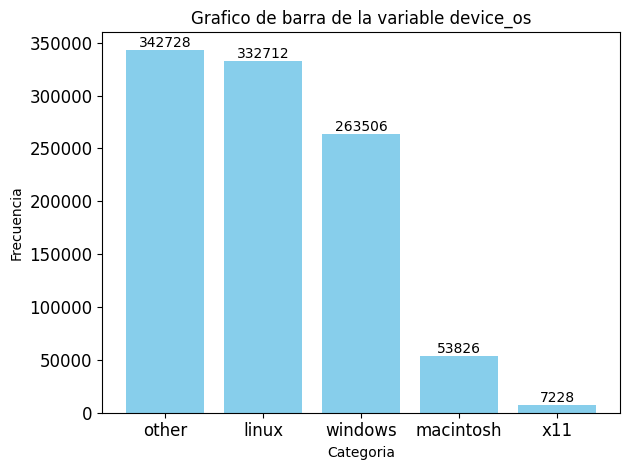

#### Analisis de la variable categorica keep_alive_session

***Resumen de la variable***


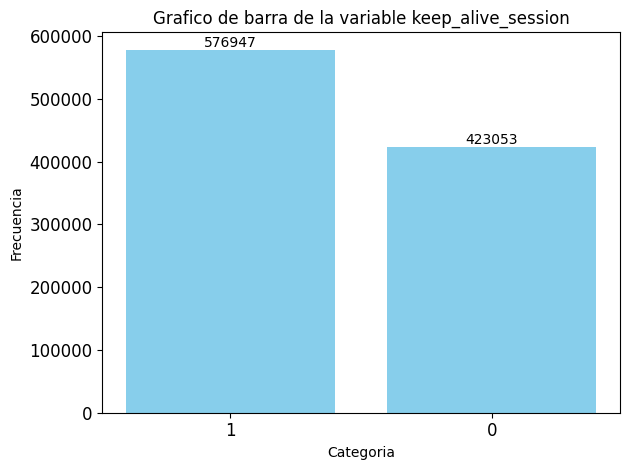

#### Analisis de la variable categorica fraud_bool

***Resumen de la variable***


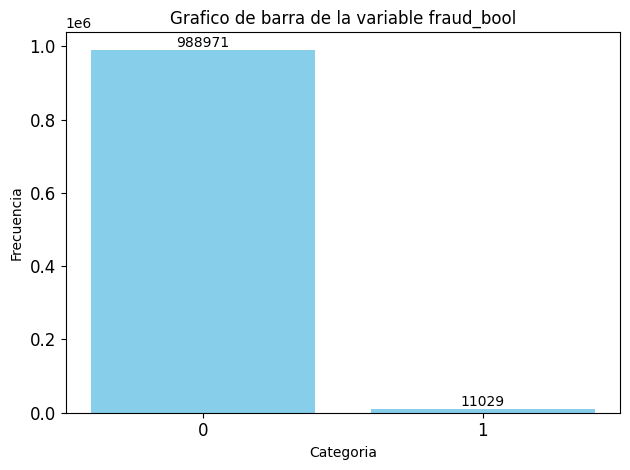

In [12]:
markdown_text = "#### Analisis de la variable categorica {}"

for column in categorical_columns:
    display(Markdown(markdown_text.format(column)))
    analysis_categorical_colum(df=data,col=column)

### Analisis de las variables númericas

#### Analisis de la variable númerica income

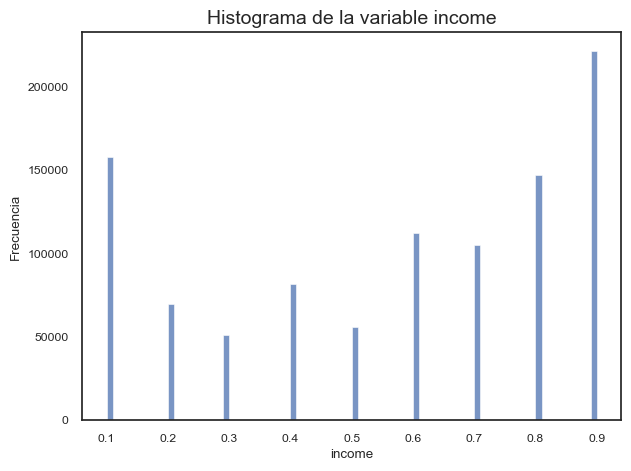

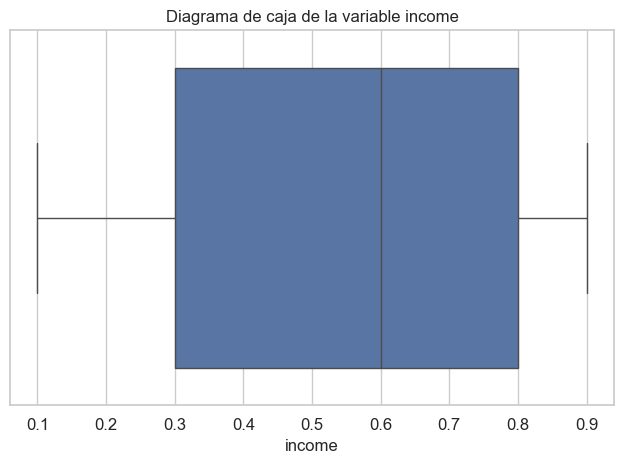

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.3863374117420326
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -1.2993664445074051
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean           0.562696
std            0.290343
min            0.100000
25%            0.300000
50%            0.600000
75%            0.800000
max            0.900000
Name: income, dtype: float64


#### Analisis de la variable númerica name_email_similarity

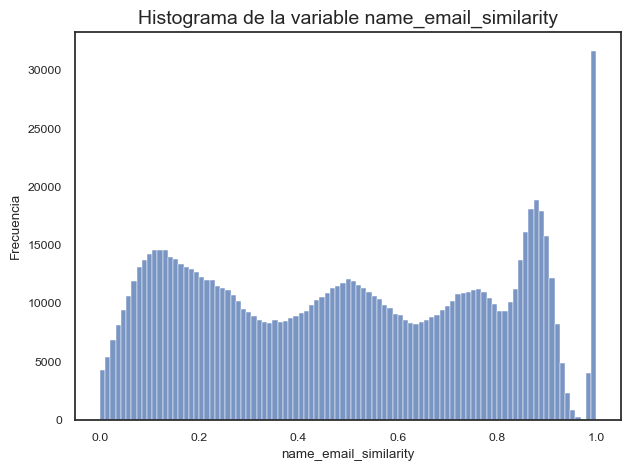

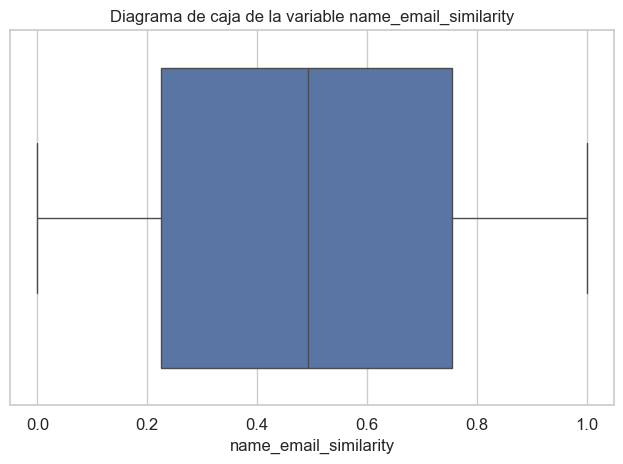

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.04283949890538419
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -1.2802792132245528
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean           0.493694
std            0.289125
min            0.000001
25%            0.225216
50%            0.492153
75%            0.755567
max            0.999999
Name: name_email_similarity, dtype: float64


#### Analisis de la variable númerica prev_address_months_count

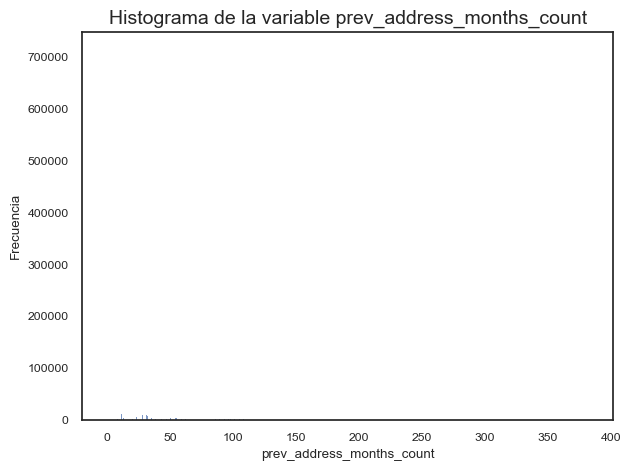

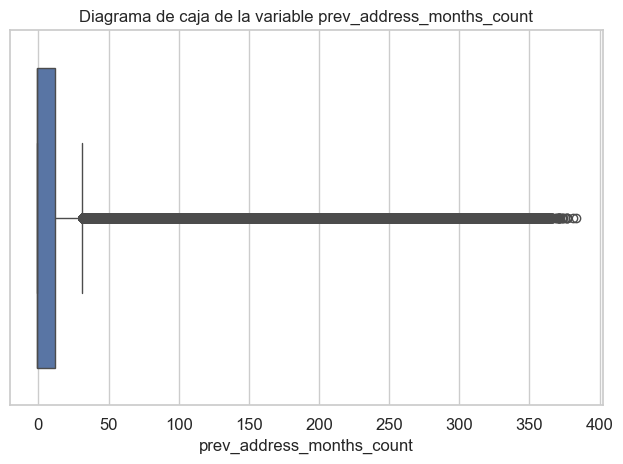

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 4.063888213067738
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 20.03108917087112
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 133345 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean          16.718568
std           44.046230
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           12.000000
max          383.000000
Name: prev_address_months_count, dtype: float64


#### Analisis de la variable númerica current_address_months_count

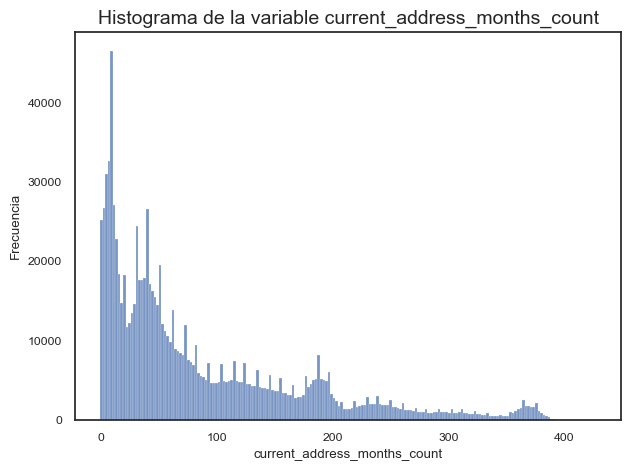

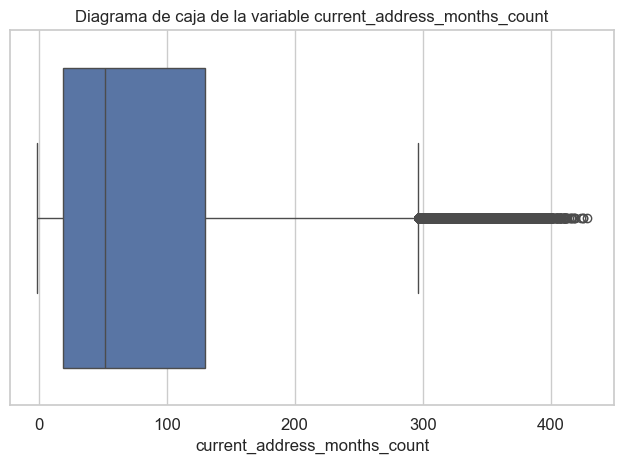

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 1.3869977002720844
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría alta. La distribución es significativamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 1.3568646047863413
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 21175 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean          86.587867
std           88.406599
min           -1.000000
25%           19.000000
50%           52.000000
75%          130.000000
max          428.000000
Name: current_address_months_count, dtype: float64


#### Analisis de la variable númerica customer_age

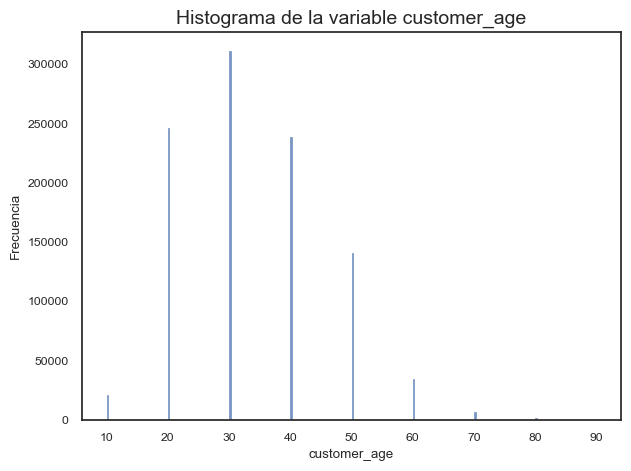

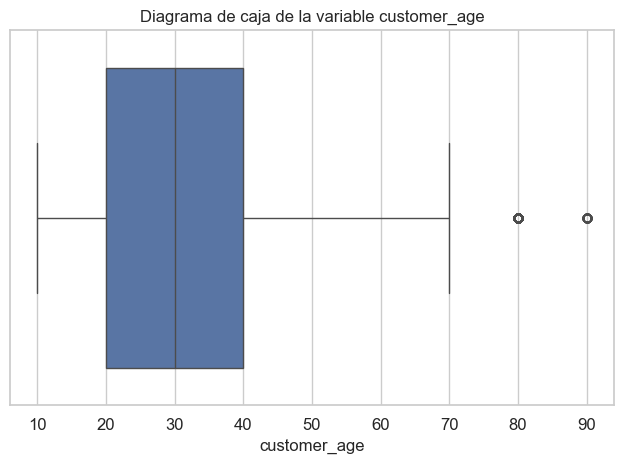

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.4780788141693699
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -0.11520328912974387
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 76 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean          33.689080
std           12.025799
min           10.000000
25%           20.000000
50%           30.000000
75%           40.000000
max           90.000000
Name: customer_age, dtype: float64


#### Analisis de la variable númerica days_since_request

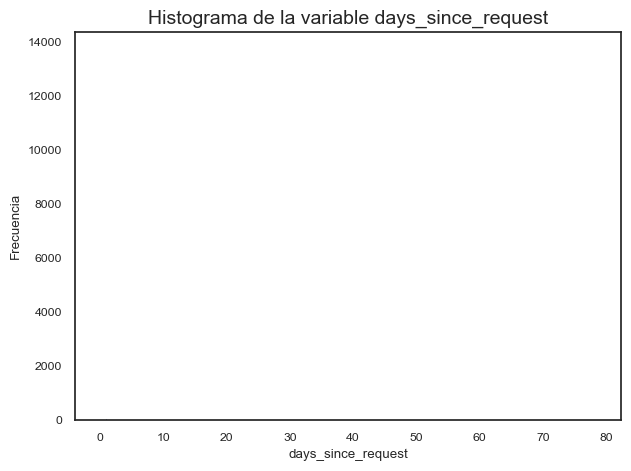

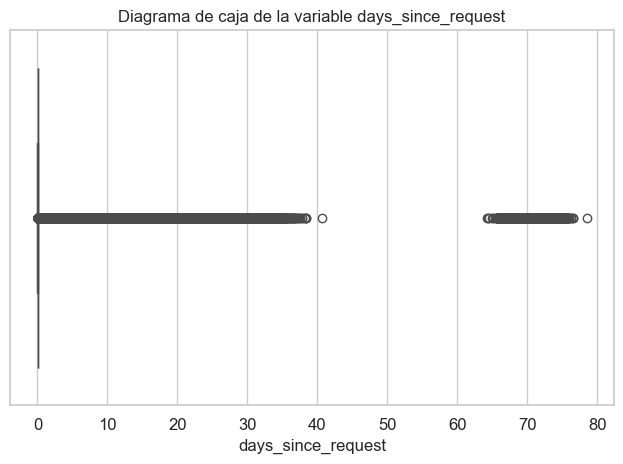

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 9.278954590837488
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 106.56921373544326
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 93776 outliers en los datos
5) Datos resumidos de la variable
count    1.000000e+06
mean     1.025705e+00
std      5.381835e+00
min      4.036860e-09
25%      7.193246e-03
50%      1.517574e-02
75%      2.633069e-02
max      7.845690e+01
Name: days_since_request, dtype: float64


#### Analisis de la variable númerica intended_balcon_amount

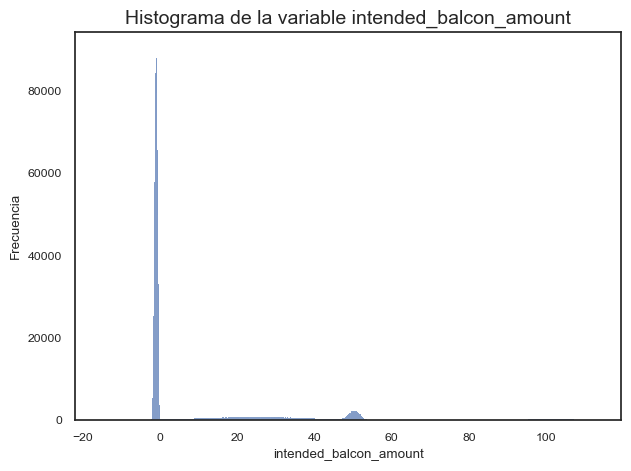

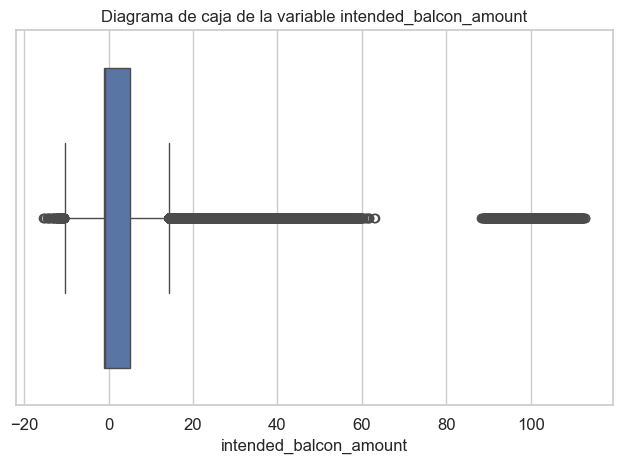

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 2.5071733898277984
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 6.846670571036366
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 208956 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean           8.661499
std           20.236155
min          -15.530555
25%           -1.181488
50%           -0.830507
75%            4.984176
max          112.956928
Name: intended_balcon_amount, dtype: float64


#### Analisis de la variable númerica zip_count_4w

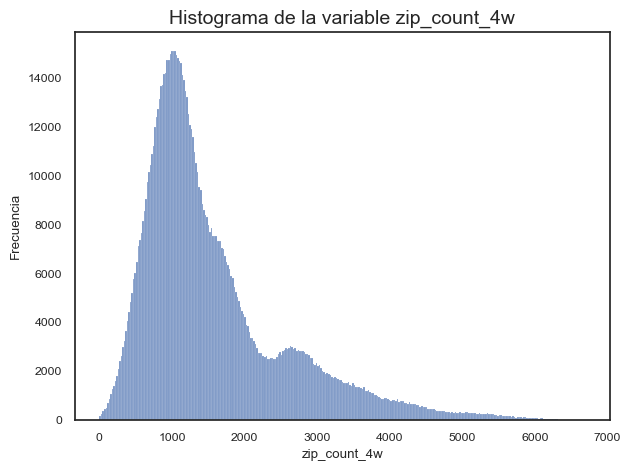

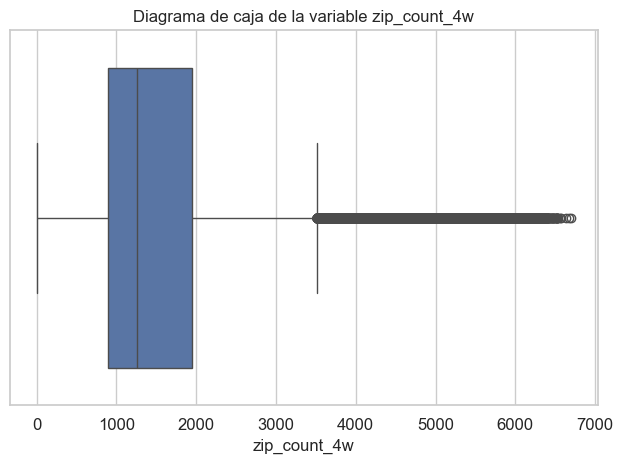

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 1.4566566365892104
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría alta. La distribución es significativamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 2.139983496302856
 *Interpretación: La distribución es platicúrtica (colas más delgadas, pocos outliers)
4) Se ha detectado 32971 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean        1572.692049
std         1005.374565
min            1.000000
25%          894.000000
50%         1263.000000
75%         1944.000000
max         6700.000000
Name: zip_count_4w, dtype: float64


#### Analisis de la variable númerica velocity_6h

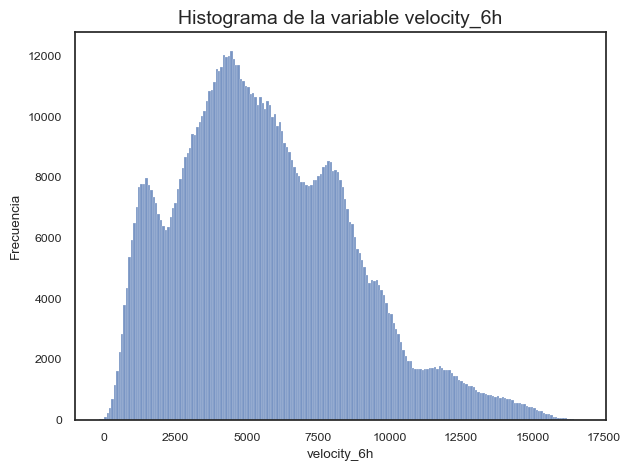

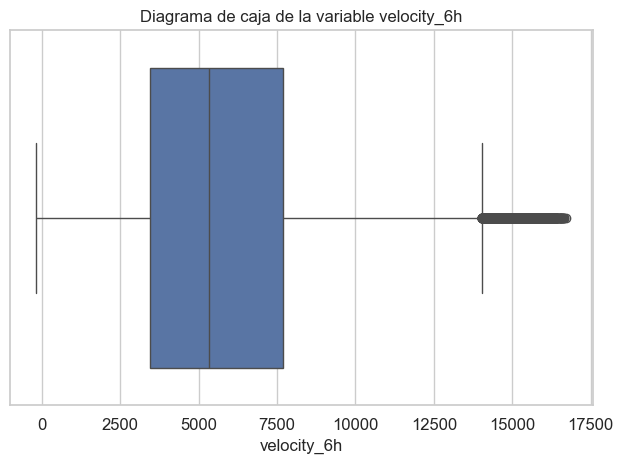

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.5626820852821426
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 0.002998102360175281
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 96 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean        5665.296605
std         3009.380665
min         -170.603072
25%         3436.365848
50%         5319.769349
75%         7680.717827
max        16715.565404
Name: velocity_6h, dtype: float64


#### Analisis de la variable númerica velocity_24h

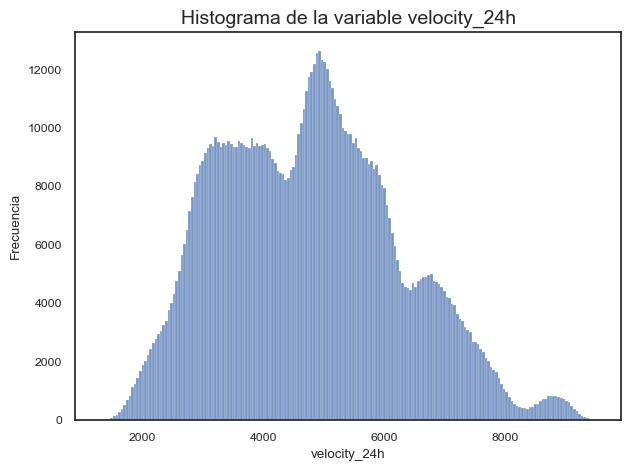

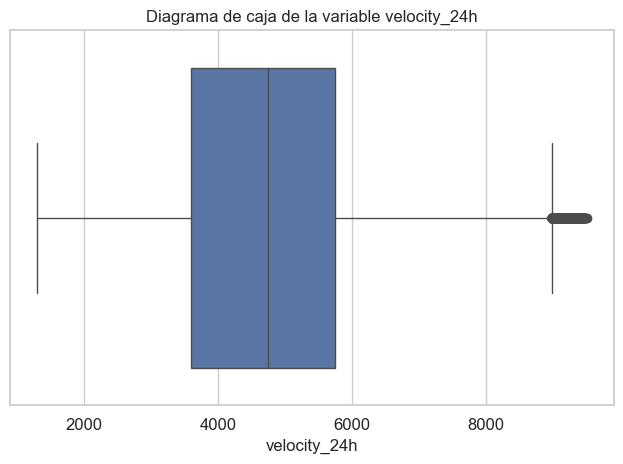

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.3311335573391919
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -0.37365388529540455
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean        4769.781965
std         1479.212612
min         1300.307314
25%         3593.179135
50%         4749.921161
75%         5752.574191
max         9506.896596
Name: velocity_24h, dtype: float64


#### Analisis de la variable númerica velocity_4w

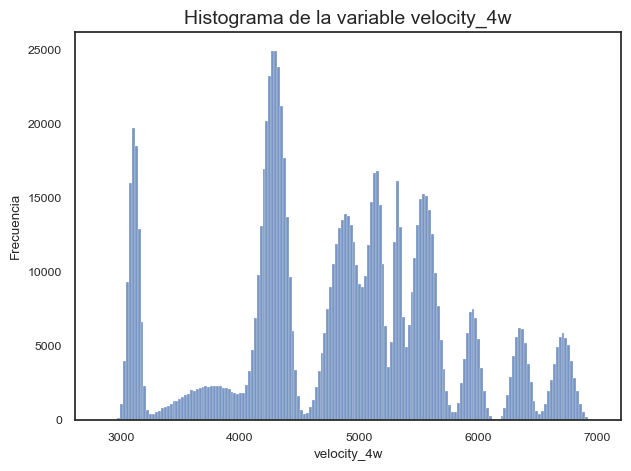

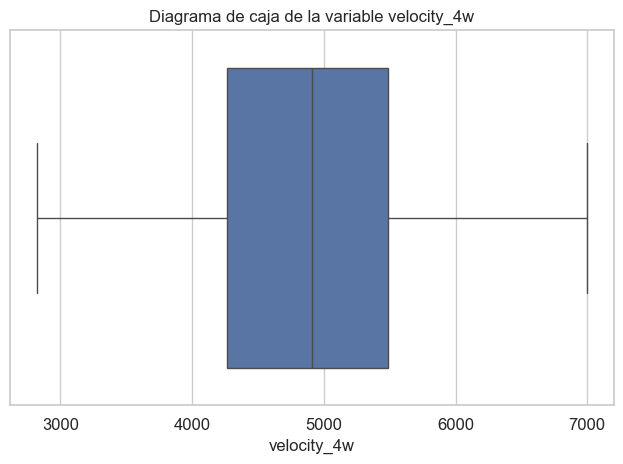

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: -0.06012477074174456
 *Interpretación: La distribución tiene cola larga a la izquierda (asimetría negativa).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar  la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado izquierdo.
3) Kurtosis: -0.3596252619693461
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean        4856.324016
std          919.843934
min         2825.748405
25%         4268.368423
50%         4913.436941
75%         5488.083356
max         6994.764201
Name: velocity_4w, dtype: float64


#### Analisis de la variable númerica bank_branch_count_8w

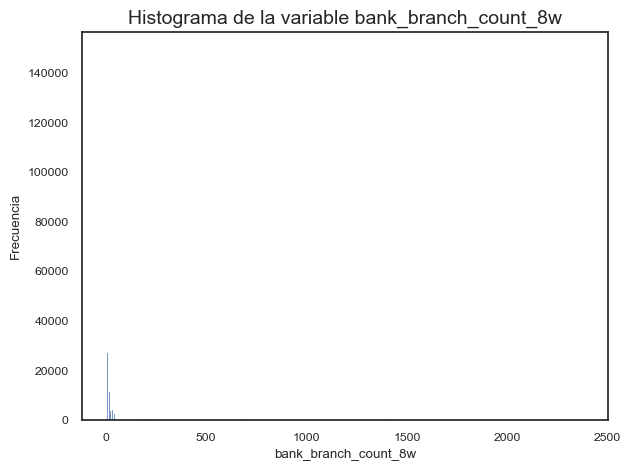

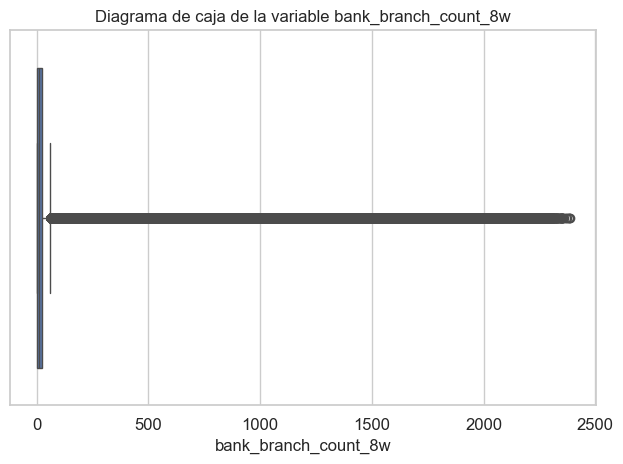

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 2.7471608118971105
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 6.502920812286307
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 174493 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean         184.361849
std          459.625329
min            0.000000
25%            1.000000
50%            9.000000
75%           25.000000
max         2385.000000
Name: bank_branch_count_8w, dtype: float64


#### Analisis de la variable númerica date_of_birth_distinct_emails_4w

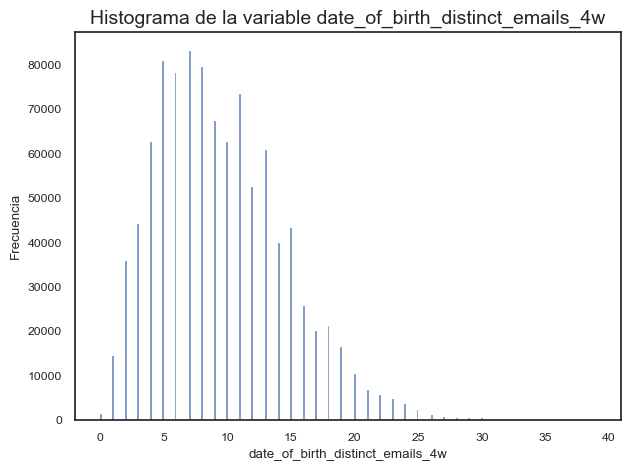

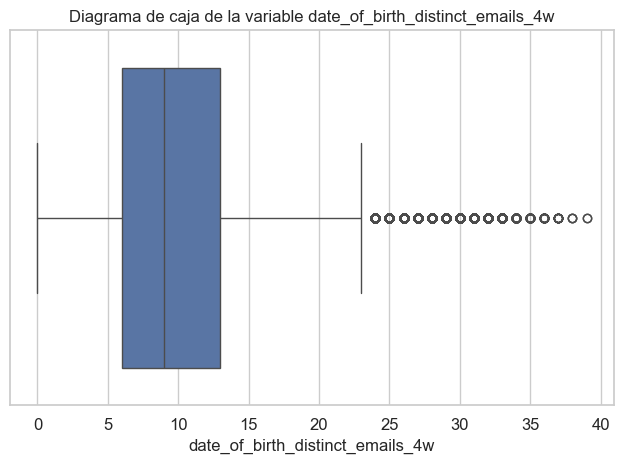

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.7032498654199966
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría moderada. La distribución presenta cierta asimetría.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 0.4364493865610708
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 2185 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean           9.503544
std            5.033792
min            0.000000
25%            6.000000
50%            9.000000
75%           13.000000
max           39.000000
Name: date_of_birth_distinct_emails_4w, dtype: float64


#### Analisis de la variable númerica credit_risk_score

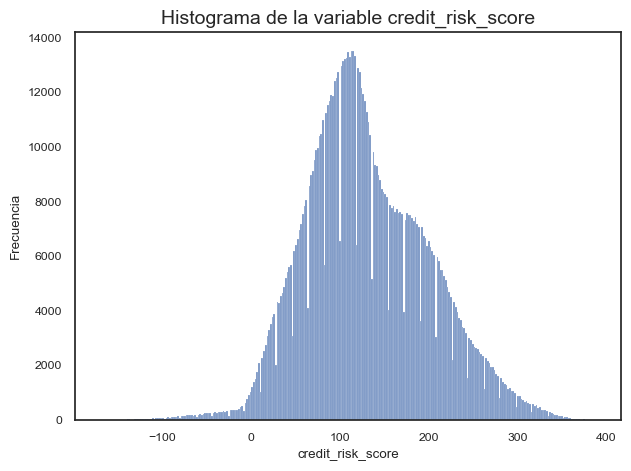

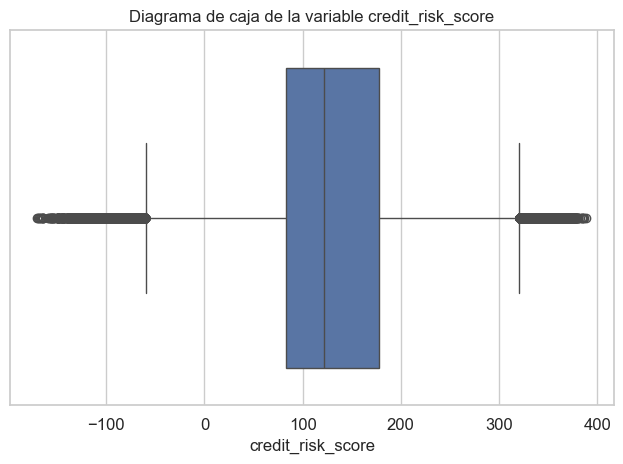

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.2958953785899288
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 0.06808748461385772
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 618 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean         130.989595
std           69.681812
min         -170.000000
25%           83.000000
50%          122.000000
75%          178.000000
max          389.000000
Name: credit_risk_score, dtype: float64


#### Analisis de la variable númerica bank_months_count

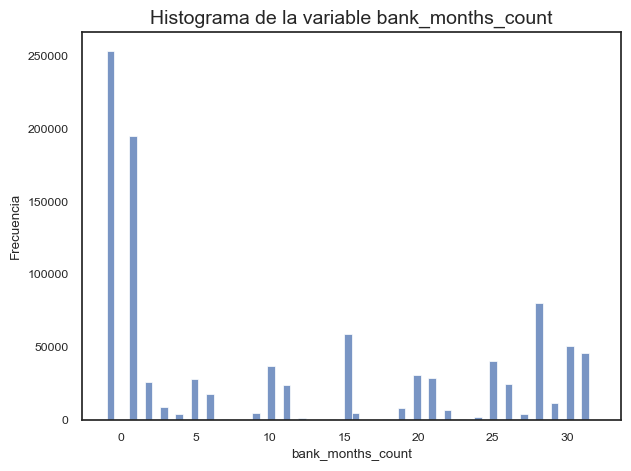

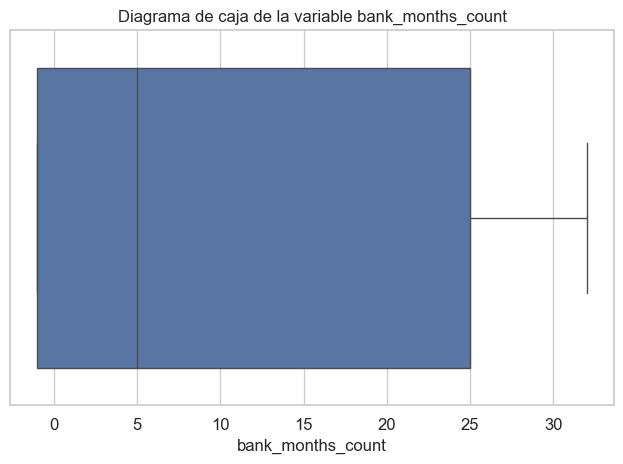

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.48874699937020843
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -1.4362302209010123
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean          10.839303
std           12.116875
min           -1.000000
25%           -1.000000
50%            5.000000
75%           25.000000
max           32.000000
Name: bank_months_count, dtype: float64


#### Analisis de la variable númerica proposed_credit_limit

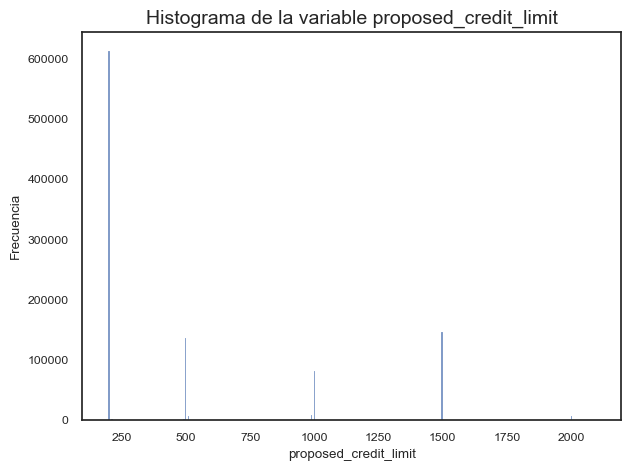

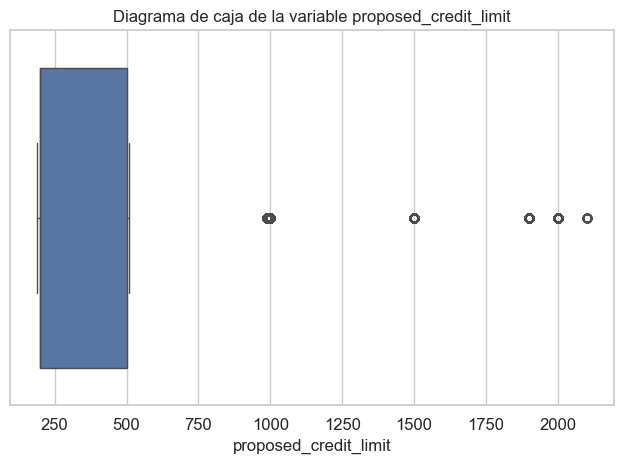

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 1.3014099769019407
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría alta. La distribución es significativamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 0.16883858077752167
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 152280 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean         515.851010
std          487.559902
min          190.000000
25%          200.000000
50%          200.000000
75%          500.000000
max         2100.000000
Name: proposed_credit_limit, dtype: float64


#### Analisis de la variable númerica session_length_in_minutes

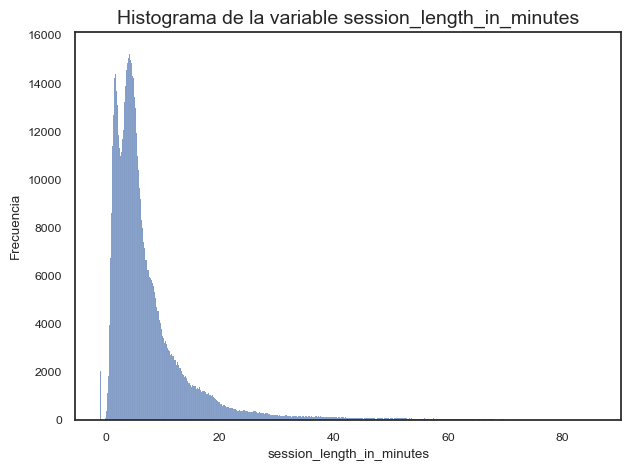

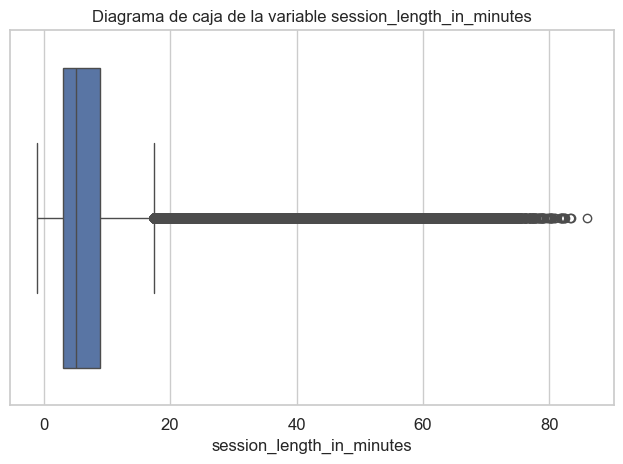

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 3.304575010782893
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 14.96130512080248
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 56318 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean           7.544940
std            8.033106
min           -1.000000
25%            3.103053
50%            5.114321
75%            8.866131
max           85.899143
Name: session_length_in_minutes, dtype: float64


#### Analisis de la variable númerica device_distinct_emails_8w

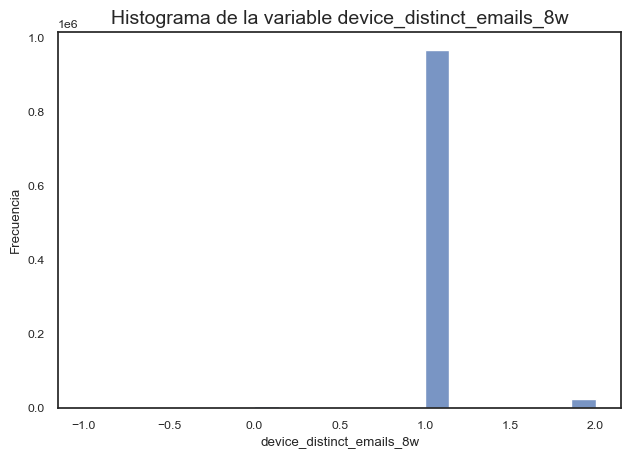

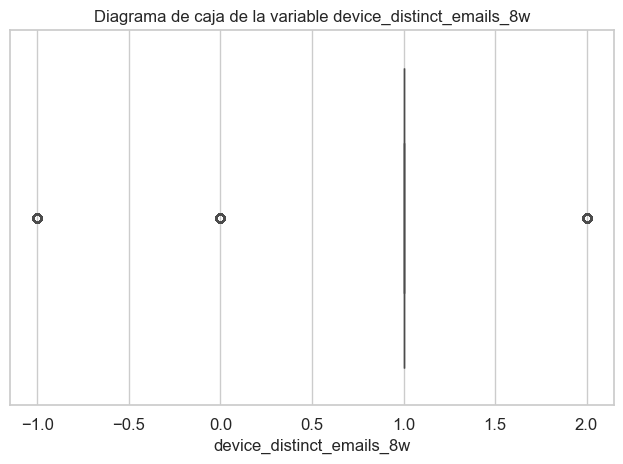

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 2.4307640060382045
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: 30.9074108996122
 *Interpretación: La distribución es leptocúrtica (colas muy gruesas, muchos outliers)
4) Se ha detectado 31933 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean           1.018312
std            0.180761
min           -1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max            2.000000
Name: device_distinct_emails_8w, dtype: float64


#### Analisis de la variable númerica device_fraud_count

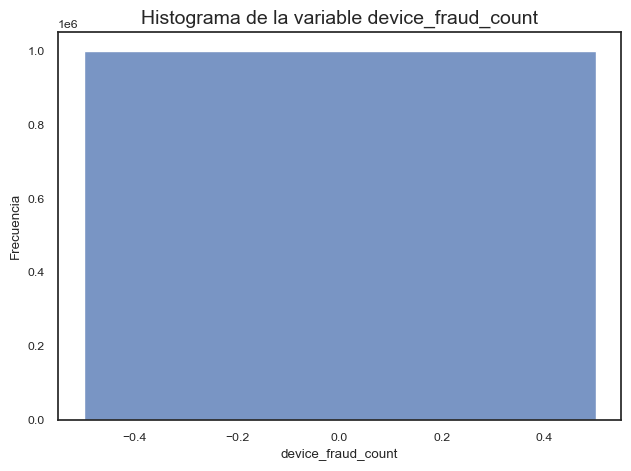

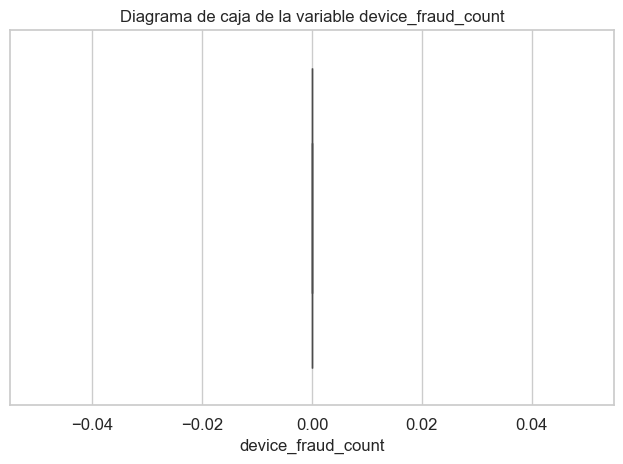

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.0
 *Interpretación: La distribución es simétrica.
 *Interpretación de la magnitud: Asimetría muy alta. La distribución es extremadamente sesgada.
 *Recomendaciones: Se puede usar técnicas estadísticas que asumen normalidad.
3) Kurtosis: 0.0
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1000000.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: device_fraud_count, dtype: float64


c:\Users\jonat\Desktop\FraudDetectAI\venv\Lib\site-packages\scipy\stats\_morestats.py:2215: RuntimeWarning:

invalid value encountered in divide



#### Analisis de la variable númerica month

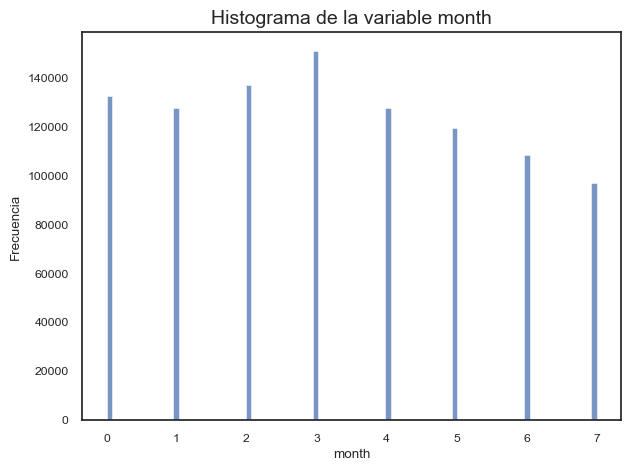

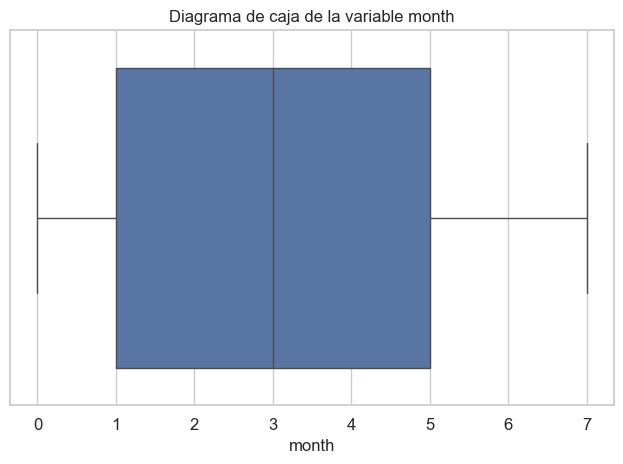

***Resumen de la variable***
1) Los datos no provienen de una distribución normal al nivel de significancia del 5%.
2) Skewness: 0.11239627697398735
 *Interpretación: La distribución tiene cola larga a la derecha (asimetría positiva).
 *Interpretación de la magnitud: Asimetría baja. La distribución es casi simétrica.
 *Recomendaciones: Considerar usar la mediana en lugar de la media. Se debe de verifica si hay outliers en el lado derecho.
3) Kurtosis: -1.1283322102479707
 *Interpretación: La distribución es platicúrtica (colas muy ligeras, valores extremos muy raros)
4) Se ha detectado 0 outliers en los datos
5) Datos resumidos de la variable
count    1000000.000000
mean           3.288674
std            2.209994
min            0.000000
25%            1.000000
50%            3.000000
75%            5.000000
max            7.000000
Name: month, dtype: float64


In [13]:
markdown_text = "#### Analisis de la variable númerica {}"
outliers = pd.DataFrame(columns=['variable', 'num_outliers'])


for column in numerical_columns:
    display(Markdown(markdown_text.format(column)))
    outlier = analysis_numeric_colum(df=data,col=column)
    outliers = pd.concat([outliers, pd.DataFrame(outlier,index=[0])], ignore_index=True)

### Obtención de metadatos
Se obtienen los metadatos para observar los datos de manera visual

In [14]:
# Se usa la librería dtale para poder obtener una vista interactiva de los datos

bank_account = dt.show(data)
bank_account.open_browser()